# Market Basket Analysis

## Required Packages

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Loading Dataset

In [2]:
df=pd.read_csv("Sales_Data1.csv")
df.head()

,sl_no,Invoice,StockCode,Description,Quantity,InvoiceDate,Date,Time,Price,Customer ID,Country,Total_price,gender,Age
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12-01-2009 07:45,01-12-2009,07:45:00,6.95,13085,United Kingdom,83.4,male,22
1,1,489434,79323P,PINK CHERRY LIGHTS,12,12-01-2009 07:45,01-12-2009,07:45:00,6.75,13085,United Kingdom,81.0,male,22
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,12-01-2009 07:45,01-12-2009,07:45:00,6.75,13085,United Kingdom,81.0,male,22
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12-01-2009 07:45,01-12-2009,07:45:00,2.10,13085,United Kingdom,100.8,male,22
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12-01-2009 07:45,01-12-2009,07:45:00,1.25,13085,United Kingdom,30.0,male,22


## Removing Duplicates And Cleaning Data

In [3]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['Invoice'], inplace=True)
df['Invoice'] = df['Invoice'].astype('str')
df = df[~df['Invoice'].str.contains('C')]
df

,sl_no,Invoice,StockCode,Description,Quantity,InvoiceDate,Date,Time,Price,Customer ID,Country,Total_price,gender,Age
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12-01-2009 07:45,01-12-2009,07:45:00,6.95,13085,United Kingdom,83.40,male,22
1,1,489434,79323P,PINK CHERRY LIGHTS,12,12-01-2009 07:45,01-12-2009,07:45:00,6.75,13085,United Kingdom,81.00,male,22
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,12-01-2009 07:45,01-12-2009,07:45:00,6.75,13085,United Kingdom,81.00,male,22
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12-01-2009 07:45,01-12-2009,07:45:00,2.10,13085,United Kingdom,100.80,male,22
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12-01-2009 07:45,01-12-2009,07:45:00,1.25,13085,United Kingdom,30.00,male,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,824359,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,09-12-2011,12:50:00,2.10,12680,France,12.60,male,65
824360,824360,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,09-12-2011,12:50:00,4.15,12680,France,16.60,male,65
824361,824361,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,09-12-2011,12:50:00,4.15,12680,France,16.60,male,65
824362,824362,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12-09-2011 12:50,09-12-2011,12:50:00,4.95,12680,France,14.85,male,65


In [4]:
basket = (df[df['Country'] =="France"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))
basket

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE POSY,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE RED SPOTTY,12 PENCILS SMALL TUBE SKULL,...,YELLOW GIANT GARDEN THERMOMETER,YELLOW RED FLOWER PIGGY BANK,YOU'RE CONFUSING ME METAL SIGN,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)
basket_sets

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE POSY,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE RED SPOTTY,12 PENCILS SMALL TUBE SKULL,...,YELLOW GIANT GARDEN THERMOMETER,YELLOW RED FLOWER PIGGY BANK,YOU'RE CONFUSING ME METAL SIGN,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
490139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
490152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Using Assosiation Rule And Apriori Rule

In [6]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.096091,0.130293,0.073290,0.762712,5.853814,0.060770,3.665193
1,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.130293,0.096091,0.073290,0.562500,5.853814,0.060770,2.066077
2,(LUNCH BOX WITH CUTLERY RETROSPOT),(STRAWBERRY LUNCH BOX WITH CUTLERY),0.153094,0.130293,0.083062,0.542553,4.164096,0.063115,1.901220
3,(STRAWBERRY LUNCH BOX WITH CUTLERY),(LUNCH BOX WITH CUTLERY RETROSPOT),0.130293,0.153094,0.083062,0.637500,4.164096,0.063115,2.336291
4,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE),0.128664,0.169381,0.091205,0.708861,4.185005,0.069412,2.852995


In [7]:
rules[ (rules['lift'] >= 6) &
      (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.138436,0.127036,0.115635,0.835294,6.575264,0.098049,5.300140
17,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127036,0.138436,0.115635,0.910256,6.575264,0.098049,9.600279
18,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.073290,0.127036,0.071661,0.977778,7.696866,0.062351,39.283388
20,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.073290,0.138436,0.071661,0.977778,7.063007,0.061515,38.770358


### Visualization

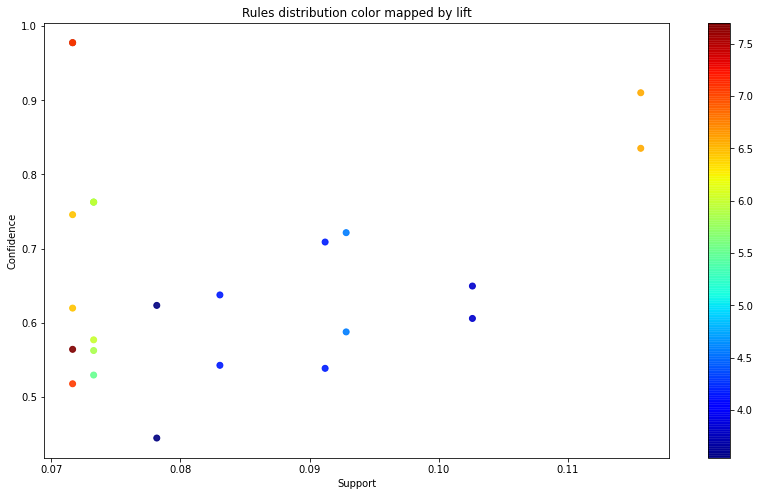

In [8]:
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Advanced data visualization
# Visualizing the rules distribution color mapped by Lift
plt.figure(figsize=(14, 8))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], alpha=0.9, cmap='jet');
plt.title('Rules distribution color mapped by lift');
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar();

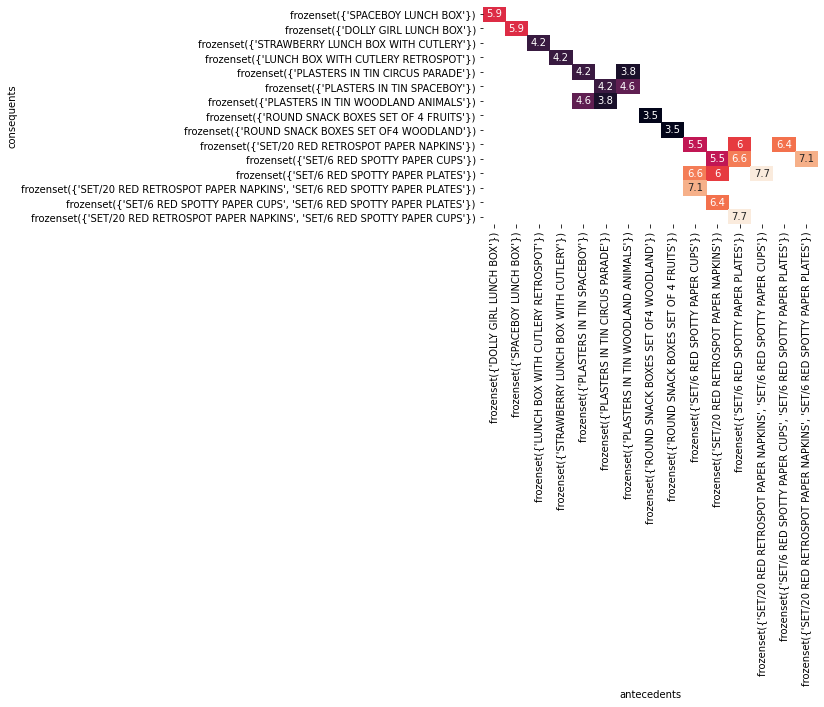

In [9]:
# Import seaborn under its standard alias
import seaborn as sns
import matplotlib.pyplot as plt

# Transform the DataFrame of rules into a matrix using the lift metric

pivot = rules.pivot(index = 'consequents', columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off

sns.heatmap(pivot, annot = True, cbar=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()